# More detail.


In this notebook, you can test my models on your own images or on new images that were not included in the training set, located in the pred folder. To do this, change the name of the saved Keras model accordingly.

## Infomation of original model (not now)

1. **`training_original_model.ipynb`**:
   - This notebook builds, trains, and evaluates a neural network model provided by my teacher using the dataset. The model achieved 86.7% accuracy on the test set, but it suffered from overfitting.

2. **`model_comparison.ipynb`**:
   - In this notebook, the original model is compared with other well-known neural networks such as Lenet5, AlexNet, and MobileNet. The original model showed the highest accuracy on the validation set but was still overfitting with 86.7% accuracy on the test set.

3. **`optimized_model.ipynb`**:
   - This notebook contains the optimized version of the original model. Regularization techniques were applied, and the model was simplified to reduce overfitting. The optimized model achieved 94.5% accuracy on the test set.

# Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import tkinter as tk
from tkinter import filedialog
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

# Preprocessing new img

In [5]:
# Function to preprocess an image
import joblib
def preprocess_image(image_path):
    scaler = joblib.load('scaler.pkl')
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = Image.fromarray(img)
    img = img.resize((64, 64))
    img = np.array(img)
    img = img.reshape((1, 64, 64, 3))  # Reshape the image to match the expected input shape
    new_image_reshaped = img.reshape(-1, img.shape[-1])
    new_image_normalized = scaler.transform(new_image_reshaped)
    new_image_normalized = new_image_normalized.reshape(img.shape)
    return new_image_normalized



# Predict new img

In [3]:
# Function to predict whether an image contains a brain tumor or not
def predict_brain_tumor(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_label = 'Yes, the image contains a brain tumor.' if prediction[0][0] > 0.5 else 'No, the image does not contain a brain tumor.'
    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


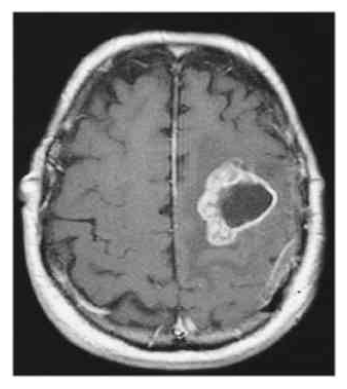

Predicted Label: Yes, the image contains a brain tumor.


In [6]:
# Load the Keras model

# Change this name to the model you want to test
model = load_model('BrainTurmor_v3.keras') 
# Example usage
image_path = './pred/pred45.jpg'
predicted_label = predict_brain_tumor(image_path)

# Display the image
img = image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the predicted label and accuracy
print('Predicted Label:', predicted_label)
